In [28]:
from datasets import load_dataset
from transformers import AutoTokenizer
from llama_index.core.node_parser import SentenceSplitter
from llama_index.core import Document

seed = int.from_bytes(b"ellamind")

embedding_id = "intfloat/multilingual-e5-small"
tokenizer = AutoTokenizer.from_pretrained(embedding_id)
chunk_size = 512
ds = load_dataset("wikimedia/wikipedia", "20231101.de", split="train")
ds = ds.shuffle(seed=seed).select(range(2000))

tokenizer = AutoTokenizer.from_pretrained("intfloat/multilingual-e5-base")
docs = [Document(doc_id=example["id"], text=example["text"]) for i, example in enumerate(ds)]

embedding_id = "intfloat/multilingual-e5-small"
tokenizer = AutoTokenizer.from_pretrained(embedding_id)
chunk_size = 512
splitter = SentenceSplitter(chunk_size=chunk_size, chunk_overlap=0, tokenizer=lambda x: tokenizer(x)["input_ids"])
nodes = splitter.get_nodes_from_documents(docs)
# nodes = nodes[:2000]
nodes = [node for node in nodes if 128 < len(tokenizer(node.text)["input_ids"]) < 512]



Resolving data files:   0%|          | 0/20 [00:00<?, ?it/s]

Token indices sequence length is longer than the specified maximum sequence length for this model (655 > 512). Running this sequence through the model will result in indexing errors


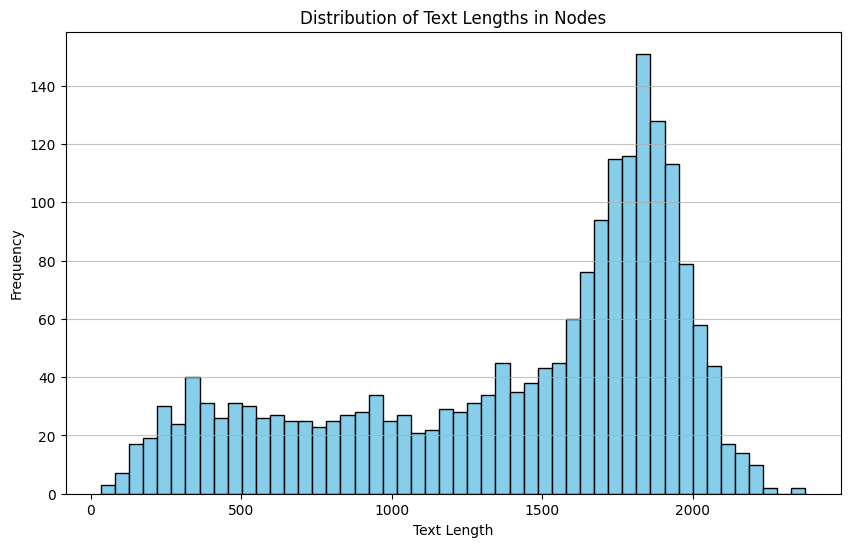

In [3]:
import matplotlib.pyplot as plt

# Extract the text from each node and compute their lengths
text_lengths = [len(node.text) for node in nodes]

# Plot the distribution of text lengths
plt.figure(figsize=(10, 6))
plt.hist(text_lengths, bins=50, color='skyblue', edgecolor='black')
plt.title('Distribution of Text Lengths in Nodes')
plt.xlabel('Text Length')
plt.ylabel('Frequency')
plt.grid(axis='y', alpha=0.75)
plt.show()


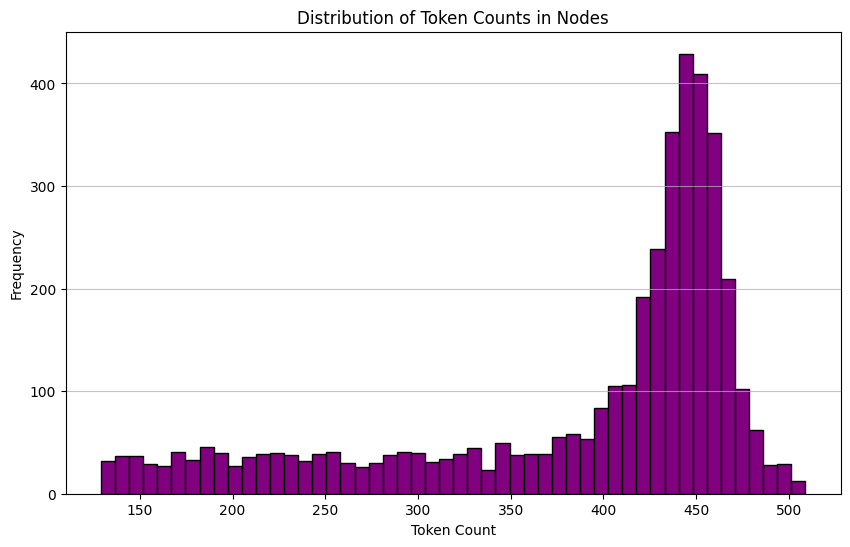

In [26]:
# Tokenize all node texts and count the tokens
token_counts = [len(tokenizer(node.text)["input_ids"]) for node in nodes]

# Plot the distribution of token counts
plt.figure(figsize=(10, 6))
plt.hist(token_counts, bins=50, color='purple', edgecolor='black')
plt.title('Distribution of Token Counts in Nodes')
plt.xlabel('Token Count')
plt.ylabel('Frequency')
plt.grid(axis='y', alpha=0.75)
plt.show()


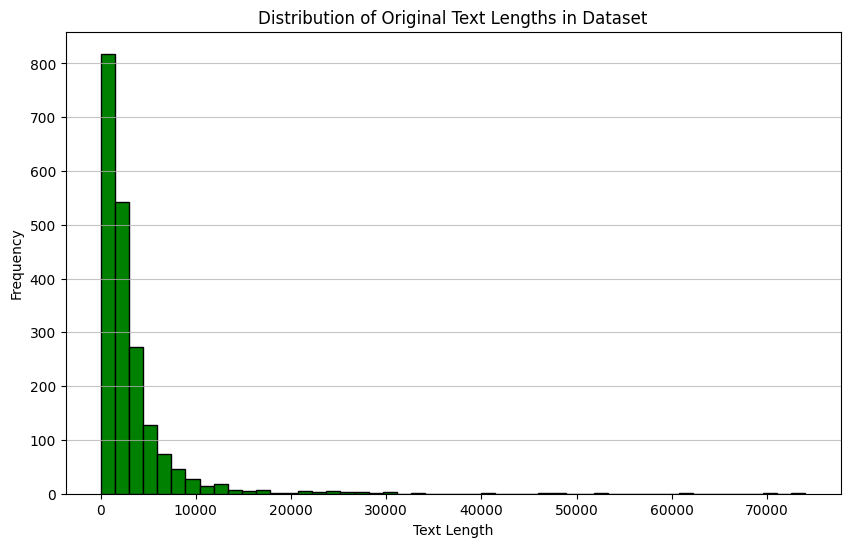

In [15]:
# Extract the text lengths from the original dataset
original_text_lengths = [len(example["text"]) for example in ds]

# Plot the distribution of original text lengths
plt.figure(figsize=(10, 6))
plt.hist(original_text_lengths, bins=50, color='green', edgecolor='black')
plt.title('Distribution of Original Text Lengths in Dataset')
plt.xlabel('Text Length')
plt.ylabel('Frequency')
plt.grid(axis='y', alpha=0.75)
plt.show()


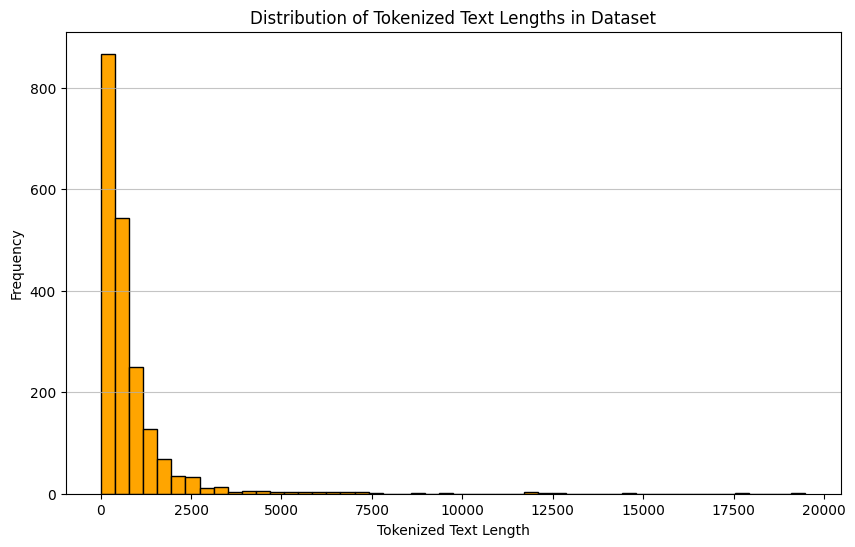

In [16]:
# Tokenize the texts from the dataset and compute their lengths
tokenized_ds_lengths = [len(tokenizer(example["text"])["input_ids"]) for example in ds]

# Plot the distribution of tokenized text lengths
plt.figure(figsize=(10, 6))
plt.hist(tokenized_ds_lengths, bins=50, color='orange', edgecolor='black')
plt.title('Distribution of Tokenized Text Lengths in Dataset')
plt.xlabel('Tokenized Text Length')
plt.ylabel('Frequency')
plt.grid(axis='y', alpha=0.75)
plt.show()


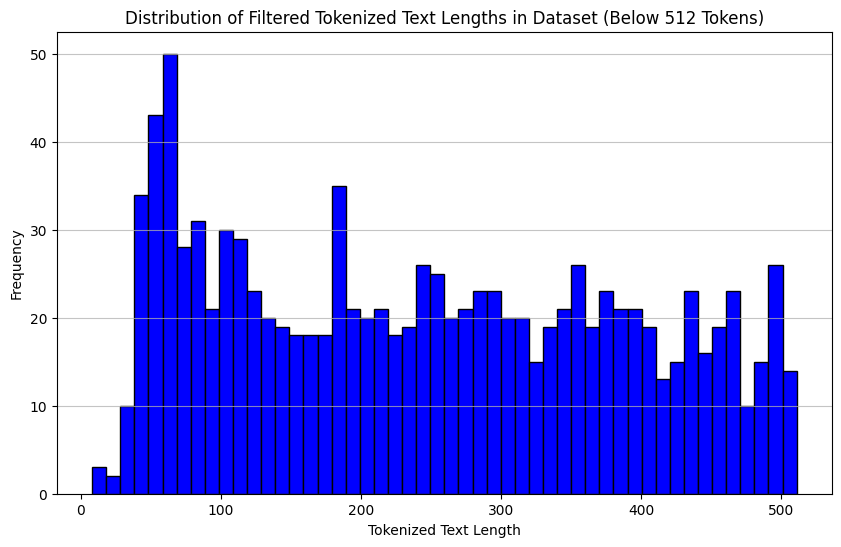

In [17]:
# Filter tokenized dataset texts to keep those with a length below 512 tokens
filtered_tokenized_ds_lengths = [length for length in tokenized_ds_lengths if length < 512]

# Plot the distribution of filtered tokenized text lengths
plt.figure(figsize=(10, 6))
plt.hist(filtered_tokenized_ds_lengths, bins=50, color='blue', edgecolor='black')
plt.title('Distribution of Filtered Tokenized Text Lengths in Dataset (Below 512 Tokens)')
plt.xlabel('Tokenized Text Length')
plt.ylabel('Frequency')
plt.grid(axis='y', alpha=0.75)
plt.show()


In [12]:
filtered_nodes = [node for node in nodes if len(node.text) >= 400]
nodes = filtered_nodes

short_to_long = sorted(nodes, key=lambda node: len(node.text))
for node in short_to_long[:10]:
    print(node)
    print("---")



Node ID: 3c36ec55-a6a8-4950-935d-031e36b1f98f
Text: Gerhard Beyer  Arzt, Notarzt a. D., Leitender Notarzt a. D.,
Stadtrat a. D.  Verleihung 2020  Er wurde anlässlich der Vollendung
seines 79. Lebensjahres für seine außerordentlichen Verdienste als
Arzt, Notarzt und weiterem zum Ehrenbürger ernannt.  Quelle
Karlheinz Spielmann: Ehrenbürger und Ehrungen in der Bundesrepublik.
1965  Einzelnachweis...
---
Node ID: 54ec51b5-d963-4af8-8a18-ad1b55470501
Text: Vattnäs ist ein Ort (Tätort) in der schwedischen Provinz
Dalarnas län und der historischen Provinz Dalarna in der Gemeinde
Mora.  Der Ort liegt auf halben Weg zwischen Orsa und Mora an der
Europastraße 45 sowie am Ufer des Sees Orsasjön. Vattnäs besitzt einen
Haltepunkt an der Inlandsbahn.  Im Gegensatz zu vielen anderen kleinen
Orten ist die Ei...
---
Node ID: 3761fdbe-d125-459c-b292-688baac11ddc
Text: ACLS steht als Abkürzung für:   AC Labor Spiez, heute nur noch
Labor Spiez genannt, schweizerische Fachstelle für den Schutz der
Bevölke

In [10]:
len("Siehe auch   Deutsches Zweirad- und NSU-Museum  NSU Werke AG Einzelnachweise   Superfox Motorradmodell mit Pressstahlrahmen")



123

In [14]:
s = 'Emotion === Physiologische Komponente === Abhängig vom Ergebnis der subjektiven Bewertung reagiert das Subjekt mit der Ausschüttung bestimmter Neurotransmitter und Hormone und verändert damit seinen physiologischen Zustand. Dieser veränderte Zustand entspricht dem Erleben einer Emotion. Das Verhältnis von physiologischen und emotionalen Vorgängen wird durch die auf William James und Carl Lange zurückgehende James-Lange-Theorie sowie die auf Walter Cannon und Philip Bard zurückgehende Cannon-Bard-Theorie betrachtet. Nach der älteren Theorie von James und Lange gehen die physiologischen Veränderungen der eigentlichen Emotion voraus, nach Cannon und Bard verlaufen beide Reaktionen als Folge des Reizes gleichzeitig. Ein Forscherteam um den Biomediziner Lauri Nummenmaa von der finnischen Aalto-Universität belegt exemplarisch mit 14 Körperkarten die Intensität spezifischer Gefühle in bestimmten Körperregionen und darüber hinaus, dass diese Körperkarten in verschiedenen Kulturkreisen überraschend ähnlich sind. Die physiologische Reaktion ist allerdings nach der Zwei-Faktoren-Theorie von der jeweiligen Situation und deren kognitiver Bewertung abhängig. Eine bestimmte Reaktion lässt sich nicht in jedem Fall einer Emotion zuordnen. Beispielsweise ist schnelles Herzklopfen beim Jogging eine Folge der Anstrengung, während bei Emotionen wie Wut und Angst schnelles Herzklopfen aus der jeweiligen Bewertung der Wahrnehmung resultiert. Die Intensität der Emotion steht allerdings in einer Interdependenz zur Stärke des physiologischen Reizes (z. B. körperliche Anstrengung verstärkt Wut; umgekehrt bereitet Wut auf körperliche Anstrengung vor). Nach der ''appraisal theory'' von Richard Lazarus entsteht eine Emotion erst dann, wenn ein Umweltstimulus zunächst als relevant (positiv oder gefährlich) oder irrelevant eingestuft wird und daraufhin in einem zweiten Schritt die persönlichen Bewältigungsmöglichkeiten (siehe Coping) eingeschätzt werden. Dazu gehört auch die Frage, wer oder was den Stimulus ausgelöst hat. Diesen beiden Modellen zufolge entsteht die Emotion also erst durch eine kognitive Bewertung. Strittig ist jedoch, ob – wie Lazarus annimmt – eine Emotion auch ohne physiologische Reizung ausgelöst werden kann. Eine ausführliche Beschreibung dieses Modells erfolgt in dem Kapitel "Stressmodelle"'

len(tokenizer(s)["input_ids"])


503

In [18]:
s = 'Anthropologie === Theologische Anthropologie === Die theologische Anthropologie als Teilbereich der Systematischen Theologie deutet den Menschen aus christlich-theologischer Sicht. Dabei beschäftigt sie sich besonders mit dem Wesen des Menschen und der Bestimmung des Menschen vor Gott. Im Unterschied dazu untersucht die Religionsethnologie als Fachgebiet der Ethnologie (Völkerkunde) die Religionen bei den weltweit rund 1300 ethnischen Gruppen und indigenen Völkern, in Abgrenzung zur Religionssoziologie vor allem bei (ehemals) schriftlosen Kulturen.'

len(tokenizer(s)["input_ids"])



128

In [22]:
filtered_nodes = [node for node in nodes if 128 < len(tokenizer(node.text)["input_ids"]) < 512]
short_to_long = sorted(filtered_nodes, key=lambda node: len(tokenizer(node.text)["input_ids"]))

# for node in short_to_long[:10]:
#     print(node.text)
#     print("---")




Marcus Messorius Diligens war ein im 2. und 3. Jahrhundert n. Chr. lebender Angehöriger des römischen Ritterstandes (Eques).

Durch eine Inschrift, die beim Kastell Habitancum gefunden wurde und die auf 211/217 datiert ist, ist belegt, dass Diligens Tribun war. Laut John Spaul war er Tribun der Cohors I Vangionum, die in der Provinz Britannia stationiert war.

Weblinks

Einzelnachweise 

Eques
Militärperson (Römische Kaiserzeit)
Römer
Mann
Geboren im 2. Jahrhundert
Gestorben im 3. Jahrhundert
---
Lucien van Geffen (* 20. November 1987 in Rotterdam) ist ein niederländischer Schauspieler.

Van Geffen begann seine schauspielerische Karriere am Jeugdtheater Hofplein. Bekannt wurde er durch die belgische Serie Het Huis Anubis, in der 2006 bis 2009 die Rolle des Fabian Ruitenberg spielte.

Filmografie 
 2006–2009: Het Huis Anubis
 2008: Anubis en het pad der 7 zonden
 2009: Anubis en de wraak van Arghus
 2010: De Terugkeer van Sibuna

Weblinks 
 
 Website von van Geffen

Filmschauspieler
Nie